In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tabulate import tabulate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bookings = pd.read_csv('/content/drive/MyDrive/airline_data/attributes.csv')

restricted_bookings = bookings[(bookings['from_airport'] == 'ATH') & (bookings['to_airport'] == 'HER')]

In [ ]:
ATH_HER_bookings = pd.read_csv('/content/drive/MyDrive/airline_data/searches-bookings/ATH-HER_bookings.csv')
ATH_HER_searches = pd.read_csv('/content/drive/MyDrive/airline_data/searches-bookings/ATH-HER_searches.csv')

ATH_LCA_bookings = pd.read_csv('/content/drive/MyDrive/airline_data/searches-bookings/ATH-LCA_bookings.csv')
ATH_LCA_searches = pd.read_csv('/content/drive/MyDrive/airline_data/searches-bookings/ATH-LCA_searches.csv')

ATH_SKG_bookings = pd.read_csv('/content/drive/MyDrive/airline_data/searches-bookings/ATH-SKG_bookings.csv')
ATH_SKG_searches = pd.read_csv('/content/drive/MyDrive/airline_data/searches-bookings/ATH-SKG_searches.csv')

HER_ATH_bookings = pd.read_csv('/content/drive/MyDrive/airline_data/searches-bookings/HER-ATH_bookings.csv')
HER_ATH_searches = pd.read_csv('/content/drive/MyDrive/airline_data/searches-bookings/HER-ATH_searches.csv')

LCA_ATH_bookings = pd.read_csv('/content/drive/MyDrive/airline_data/searches-bookings/LCA-ATH_bookings.csv')
LCA_ATH_searches = pd.read_csv('/content/drive/MyDrive/airline_data/searches-bookings/LCA-ATH_searches.csv')

SKG_ATH_bookings = pd.read_csv('/content/drive/MyDrive/airline_data/searches-bookings/SKG-ATH_bookings.csv')
SKG_ATH_searches = pd.read_csv('/content/drive/MyDrive/airline_data/searches-bookings/SKG-ATH_searches.csv')


In [ ]:
display(ATH_HER_bookings)
display(ATH_HER_searches)

,Book Date,Travel Date,Route,Number of Bookings,Average revenue per booking
0,2023-07-04,2023-09-12,ATH-HER,8,447.920000
1,2023-07-04,2023-09-23,ATH-HER,8,479.919998
2,2023-07-04,2023-08-17,ATH-HER,6,539.940001
3,2023-07-04,2023-09-14,ATH-HER,6,431.940001
4,2023-07-04,2023-08-05,ATH-HER,5,425.949998
...,...,...,...,...,...
2254,2023-08-22,2023-09-07,ATH-HER,1,83.990000
2255,2023-08-22,2023-10-09,ATH-HER,1,50.990000
2256,2023-08-22,2023-10-13,ATH-HER,1,42.893517
2257,2023-08-22,2023-10-31,ATH-HER,1,50.875561


,Search date,Departure date,Origin,Destination,No of website visits
0,2023-01-01,2023-8-3,ATH,HER,2
1,2023-01-01,2023-8-12,ATH,HER,3
2,2023-01-01,2023-8-18,ATH,HER,2
3,2023-01-01,2023-8-21,ATH,HER,3
4,2023-01-01,2023-9-14,ATH,HER,5
...,...,...,...,...,...
14131,2023-08-22,2023-8-30,ATH,HER,1
14132,2023-08-22,2023-08-23,ATH,HER,4
14133,2023-08-22,2023-08-28,ATH,HER,1
14134,2023-08-22,2023-10-06,ATH,HER,2


In [ ]:
# Sort ATH_HER_searches by 'Departure date' and then display it
sorted_searches = ATH_HER_searches.sort_values(by='Departure date')
display(sorted_searches)
# Sort ATH_HER_searches by 'Departure date' and then display it
sorted_bookings = ATH_HER_bookings.sort_values(by='Travel Date')
display(sorted_bookings)

,Search date,Departure date,Origin,Destination,No of website visits
2736,2023-04-16,2023-08-01,ATH,HER,1
6429,2023-06-14,2023-08-01,ATH,HER,1
8937,2023-07-12,2023-08-01,ATH,HER,14
7370,2023-06-25,2023-08-01,ATH,HER,2
4399,2023-05-17,2023-08-01,ATH,HER,1
...,...,...,...,...,...
13969,2023-08-21,2023-9-9,ATH,HER,17
4719,2023-05-23,2023-9-9,ATH,HER,2
2531,2023-04-11,2023-9-9,ATH,HER,2
2571,2023-04-12,2023-9-9,ATH,HER,2


,Book Date,Travel Date,Route,Number of Bookings,Average revenue per booking
929,2023-07-26,2023-08-01,ATH-HER,19,1623.385344
504,2023-07-18,2023-08-01,ATH-HER,9,670.721223
43,2023-07-05,2023-08-01,ATH-HER,2,165.980000
1210,2023-08-01,2023-08-01,ATH-HER,9,1229.327735
725,2023-07-22,2023-08-01,ATH-HER,3,237.220000
...,...,...,...,...,...
840,2023-07-24,2023-12-28,ATH-HER,4,187.959999
2166,2023-08-20,2023-12-29,ATH-HER,3,128.970001
764,2023-07-23,2023-12-29,ATH-HER,5,252.949999
1856,2023-08-13,2023-12-30,ATH-HER,4,223.960002


In [ ]:
# Define all the routes and their paired DataFrames
routes = ['ATH_HER', 'ATH_LCA', 'ATH_SKG', 'HER_ATH', 'LCA_ATH', 'SKG_ATH']
bookings_dfs = [ATH_HER_bookings, ATH_LCA_bookings, ATH_SKG_bookings, HER_ATH_bookings, LCA_ATH_bookings, SKG_ATH_bookings]
searches_dfs = [ATH_HER_searches, ATH_LCA_searches, ATH_SKG_searches, HER_ATH_searches, LCA_ATH_searches, SKG_ATH_searches]

conversion_rate_dfs = {}  # Store the result for each route here

for route, bookings_df, searches_df in zip(routes, bookings_dfs, searches_dfs):
    # Convert dates to datetime format
    bookings_df['Travel Date'] = pd.to_datetime(bookings_df['Travel Date'])
    searches_df['Departure date'] = pd.to_datetime(searches_df['Departure date'])

    # Group and sum bookings and searches
    bookings_sum = bookings_df.groupby('Travel Date')['Number of Bookings'].sum().sort_index()
    searches_sum = searches_df.groupby('Departure date')['No of website visits'].sum().sort_index()

    # Find common indices
    common_indices = bookings_sum.index.intersection(searches_sum.index)

    # Compute the conversion rates for the common indices
    conversion_rates = bookings_sum[common_indices] / searches_sum[common_indices]

    conversion_rates_df = conversion_rates.reset_index()
    conversion_rates_df.columns = ['Departure Date', 'Conversion Rate']

    conversion_rate_dfs[route] = conversion_rates_df  # Save the result to the dictionary

# Display results
for route, df in conversion_rate_dfs.items():
    print(f"Conversion Rates for {route}:")
    display(df)
    print("\n")


Conversion Rates for ATH_HER:


,Departure Date,Conversion Rate
0,2023-08-01,0.110523
1,2023-08-02,0.155367
2,2023-08-03,0.161056
3,2023-08-04,0.132267
4,2023-08-05,0.067060
...,...,...
139,2023-12-27,0.066667
140,2023-12-28,0.153846
141,2023-12-29,0.115942
142,2023-12-30,0.102564




Conversion Rates for ATH_LCA:


,Departure Date,Conversion Rate
0,2023-08-01,0.159478
1,2023-08-02,0.208791
2,2023-08-03,0.248357
3,2023-08-04,0.174603
4,2023-08-05,0.136300
...,...,...
140,2023-12-27,0.464789
141,2023-12-28,0.270270
142,2023-12-29,0.111111
143,2023-12-30,0.480000




Conversion Rates for ATH_SKG:


,Departure Date,Conversion Rate
0,2023-08-01,0.167528
1,2023-08-02,0.188738
2,2023-08-03,0.190057
3,2023-08-04,0.069136
4,2023-08-05,0.120509
...,...,...
146,2023-12-27,0.126582
147,2023-12-28,0.058824
148,2023-12-29,0.075758
149,2023-12-30,0.191489




Conversion Rates for HER_ATH:


,Departure Date,Conversion Rate
0,2023-08-01,0.198447
1,2023-08-02,0.192033
2,2023-08-03,0.263017
3,2023-08-04,0.245308
4,2023-08-05,0.170601
...,...,...
140,2023-12-27,0.041096
141,2023-12-28,0.105263
142,2023-12-29,0.142857
143,2023-12-30,0.108108




Conversion Rates for LCA_ATH:


,Departure Date,Conversion Rate
0,2023-08-01,0.096174
1,2023-08-02,0.158301
2,2023-08-03,0.115651
3,2023-08-04,0.090642
4,2023-08-05,0.069157
...,...,...
141,2023-12-27,0.059305
142,2023-12-28,0.040609
143,2023-12-29,0.017910
144,2023-12-30,0.028708




Conversion Rates for SKG_ATH:


,Departure Date,Conversion Rate
0,2023-08-01,0.144737
1,2023-08-02,0.164751
2,2023-08-03,0.165174
3,2023-08-04,0.070461
4,2023-08-05,0.114713
...,...,...
143,2023-12-27,0.112676
144,2023-12-28,0.080000
145,2023-12-29,0.145455
146,2023-12-30,0.095238


In [ ]:
import pandas as pd

# Define all the routes and their paired DataFrames
routes = ['ATH_HER', 'ATH_LCA', 'ATH_SKG', 'HER_ATH', 'LCA_ATH', 'SKG_ATH']
bookings_dfs = [ATH_HER_bookings, ATH_LCA_bookings, ATH_SKG_bookings, HER_ATH_bookings, LCA_ATH_bookings, SKG_ATH_bookings]
searches_dfs = [ATH_HER_searches, ATH_LCA_searches, ATH_SKG_searches, HER_ATH_searches, LCA_ATH_searches, SKG_ATH_searches]

# Create an empty DataFrame to append results into
combined_df = pd.DataFrame(columns=['Departure Date', 'Conversion Rate', 'from_airport', 'to_airport'])

dfs_to_concat = []  # List to hold individual dataframes

for route, bookings_df, searches_df in zip(routes, bookings_dfs, searches_dfs):
    # Convert dates to datetime format
    bookings_df['Travel Date'] = pd.to_datetime(bookings_df['Travel Date'])
    searches_df['Departure date'] = pd.to_datetime(searches_df['Departure date'])

    # Group and sum bookings and searches
    bookings_sum = bookings_df.groupby('Travel Date')['Number of Bookings'].sum().sort_index()
    searches_sum = searches_df.groupby('Departure date')['No of website visits'].sum().sort_index()

    # Find common indices
    common_indices = bookings_sum.index.intersection(searches_sum.index)

    # Compute the conversion rates for the common indices
    conversion_rates = bookings_sum[common_indices] / searches_sum[common_indices]

    conversion_rates_df = conversion_rates.reset_index()
    conversion_rates_df.columns = ['Departure Date', 'Conversion Rate']

    # Extract 'from_airport' and 'to_airport' from route
    from_airport, to_airport = route.split('_')
    conversion_rates_df['from_airport'] = from_airport
    conversion_rates_df['to_airport'] = to_airport

    # Append the DataFrame to the list
    dfs_to_concat.append(conversion_rates_df)

# Combine all individual DataFrames
combined_df = pd.concat(dfs_to_concat, ignore_index=True)

# Display the combined DataFrame
display(combined_df)


,Departure Date,Conversion Rate,from_airport,to_airport
0,2023-08-01,0.110523,ATH,HER
1,2023-08-02,0.155367,ATH,HER
2,2023-08-03,0.161056,ATH,HER
3,2023-08-04,0.132267,ATH,HER
4,2023-08-05,0.067060,ATH,HER
...,...,...,...,...
874,2023-12-27,0.112676,SKG,ATH
875,2023-12-28,0.080000,SKG,ATH
876,2023-12-29,0.145455,SKG,ATH
877,2023-12-30,0.095238,SKG,ATH


In [ ]:
combined_df.to_csv("/content/drive/MyDrive/airline_data/conversion_rate.csv")

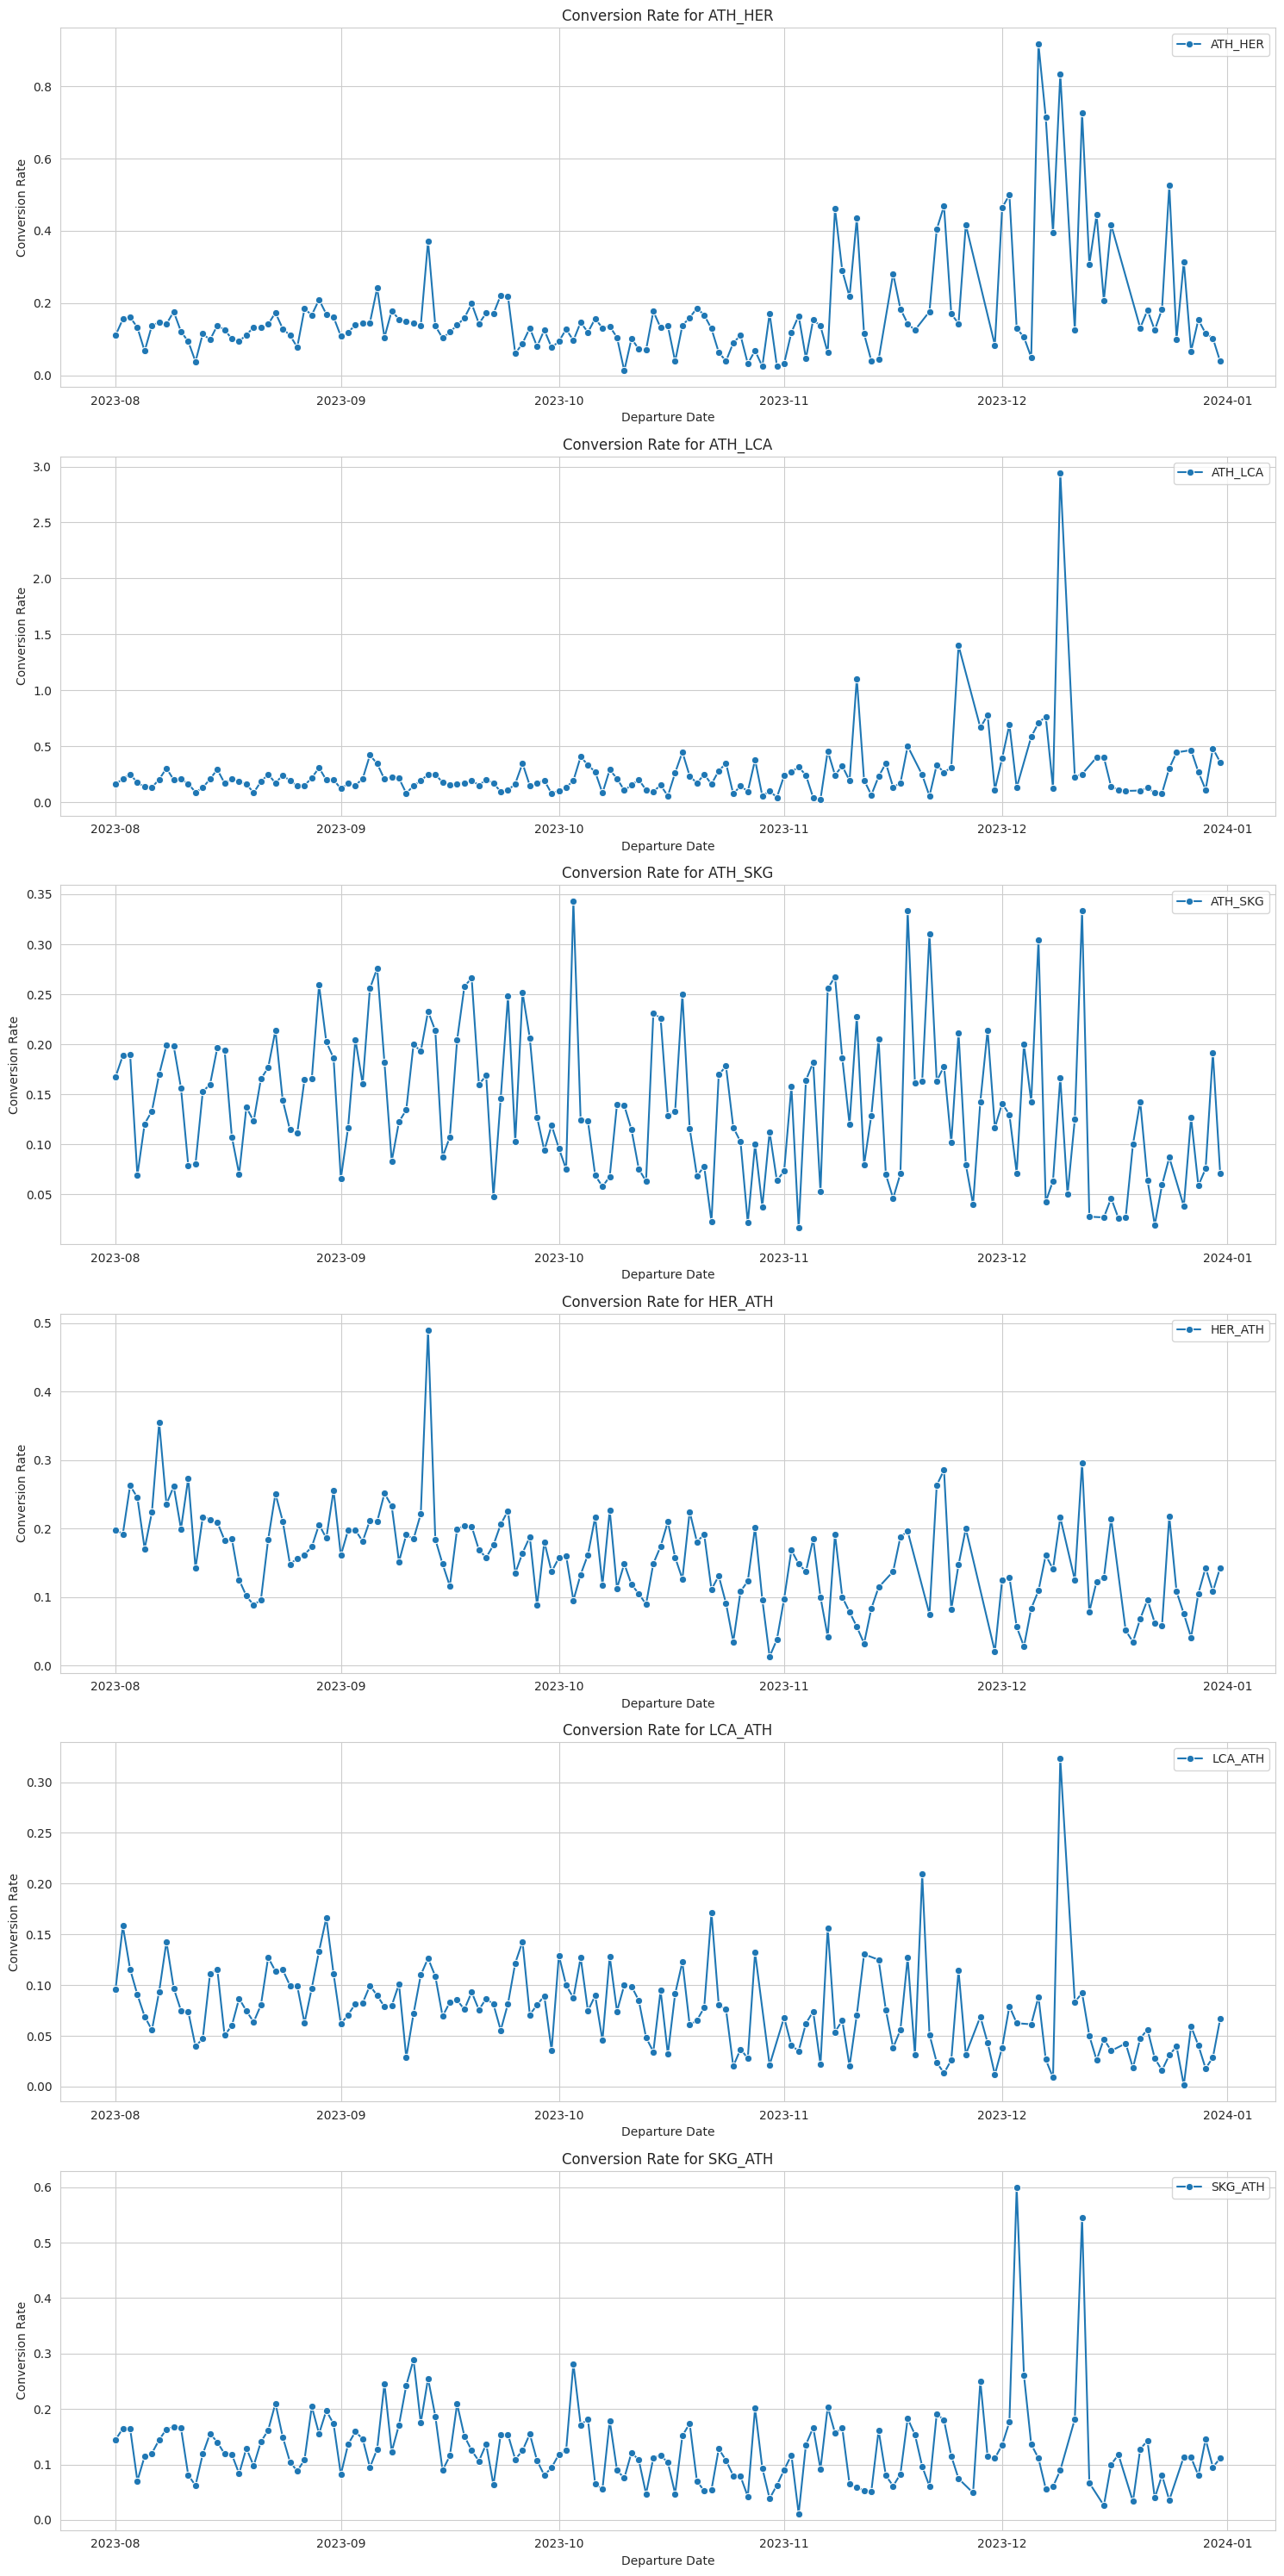

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique routes
unique_routes = combined_df['from_airport'] + '_' + combined_df['to_airport']
unique_routes = unique_routes.unique()

# Set a style and size for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5 * len(unique_routes)))  # Adjust the height based on the number of routes

for idx, route in enumerate(unique_routes, 1):
    plt.subplot(len(unique_routes), 1, idx)

    # Filter data for the current route
    route_data = combined_df[(combined_df['from_airport'] + '_' + combined_df['to_airport']) == route]

    # Plot
    sns.lineplot(data=route_data, x='Departure Date', y='Conversion Rate', marker='o', label=route)
    plt.title(f'Conversion Rate for {route}')
    plt.ylabel('Conversion Rate')
    plt.xlabel('Departure Date')
    plt.legend()

plt.tight_layout()
plt.show()


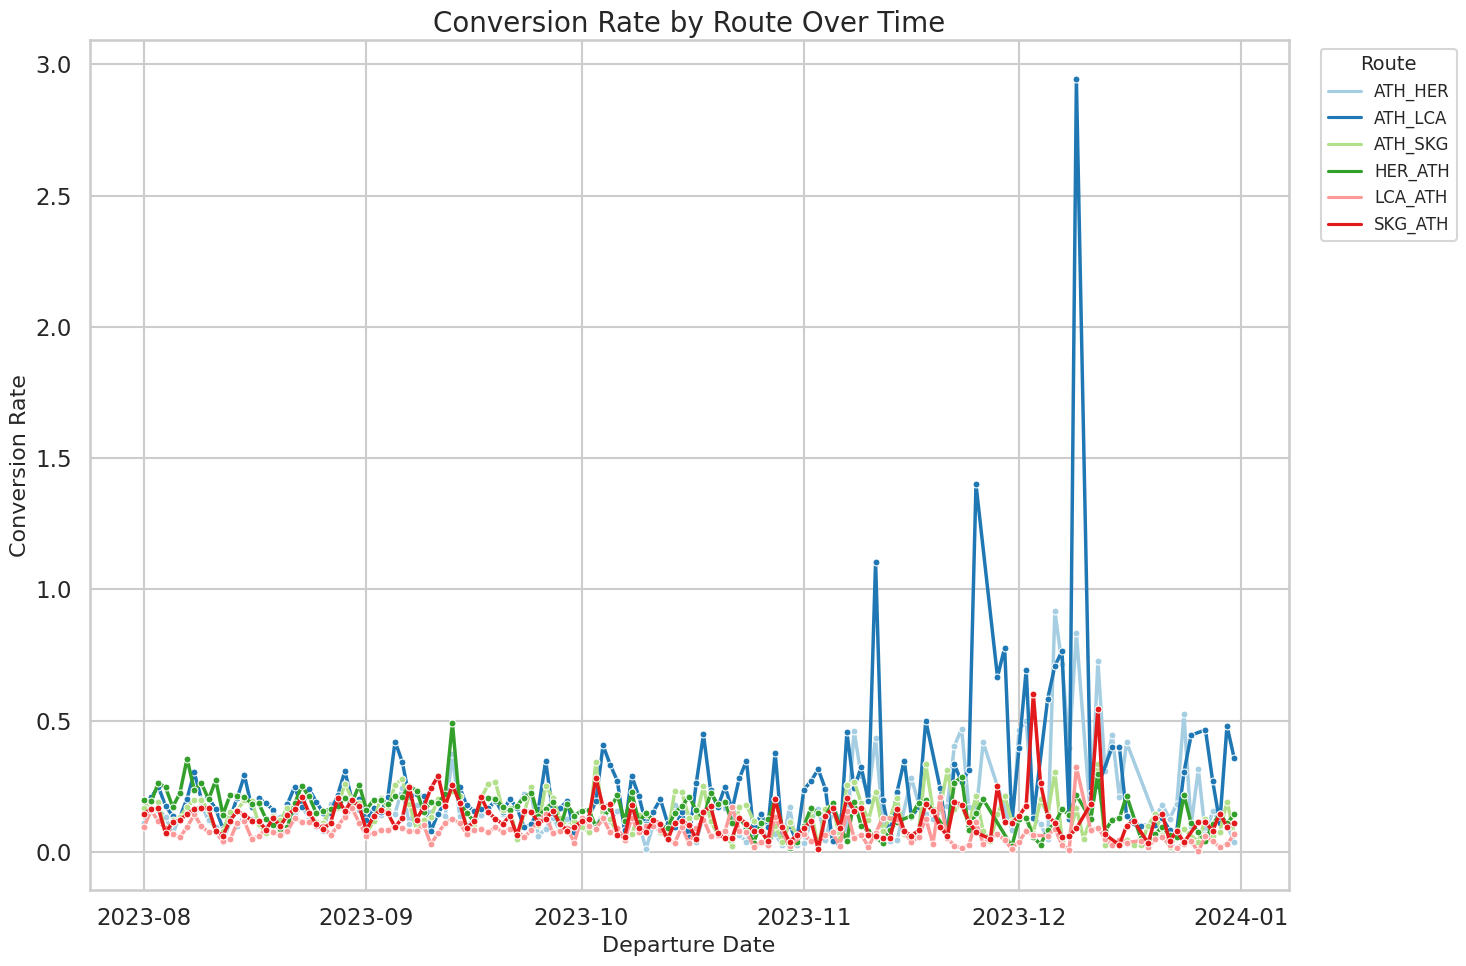

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 'Route' column combining 'from_airport' and 'to_airport'
combined_df['Route'] = combined_df['from_airport'] + '_' + combined_df['to_airport']

# Set the style and context
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("Paired")

# Create the plot
plt.figure(figsize=(15, 10))
ax = sns.lineplot(
    data=combined_df,
    x='Departure Date',
    y='Conversion Rate',
    hue='Route',
    marker='o',
    markersize=5,  # Adjust this value for desired dot size
    linewidth=2.5
)

# Set titles and labels
ax.set_title('Conversion Rate by Route Over Time', fontsize=20)
ax.set_ylabel('Conversion Rate', fontsize=16)
ax.set_xlabel('Departure Date', fontsize=16)

# Adjust the legend
ax.legend(title='Route', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)
ax.get_legend().get_title().set_fontsize('14')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
anomalies = combined_df[combined_df['Conversion Rate'] > 1][['Departure Date', 'Route', 'Conversion Rate']]

display(anomalies)



,Departure Date,Route,Conversion Rate
246,2023-11-11,ATH_LCA,1.105263
259,2023-11-25,ATH_LCA,1.400000
270,2023-12-09,ATH_LCA,2.944444
